# Use case:
## Predict best price for VW Passat B6 TDI basing on real offers

### Settings

In [1]:
percent_of_test_data = 25
main_url = 'https://www.otomoto.pl/osobowe/volkswagen/passat/b6-2005-2010/?search%5Bfilter_enum_fuel_type%5D%5B0%5D=diesel&search%5Bfilter_enum_damaged%5D=0&search%5Bfilter_enum_registered%5D=1&search%5Bcountry%5D='

### Prepare environment

In [2]:
import sys
sys.path.append('/Users/tomek/OneDrive/Projects/Machine Learning/car-price-prediction')

import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import car_price_prediction

### Count pages with offers

In [3]:
pages = car_price_prediction.count_pages(main_url)
print("Found %d pages" % pages)

Found 28 pages


### Collect samples from those pages

In [52]:
Xy = car_price_prediction.collect_data(main_url,pages)

print("Collected %d samples" % len(Xy))
#print(Xy.shape)
print("\nLast 10 samples:")
print("[year, mileage, capacity, price]")
np.set_printoptions(precision=0)
print(Xy[-10:])

	Parsing page: 1

	Parsing page: 2

	Parsing page: 3

	Parsing page: 4

	Parsing page: 5

	Parsing page: 6

	Parsing page: 7

	Parsing page: 8

	Parsing page: 9

	Parsing page: 10

	Parsing page: 11

	Parsing page: 12

	Parsing page: 13



Collected 402 samples

Last 10 samples:
[year, mileage, capacity, price]
[[   2006.  201189.    1998.   18700.]
 [   2010.  156000.    2000.   33500.]
 [   2009.  230000.    2000.   39500.]
 [   2007.  239000.    1968.   18900.]
 [   2008.  258000.    2000.   21500.]
 [   2005.  299000.    2000.   13999.]
 [   2007.  224000.    1968.   21000.]
 [   2005.  270000.    2000.   12900.]
 [   2006.  238000.    1968.   18900.]
 [   2007.  250000.    1896.   21900.]]


## Let's have some fun with that data

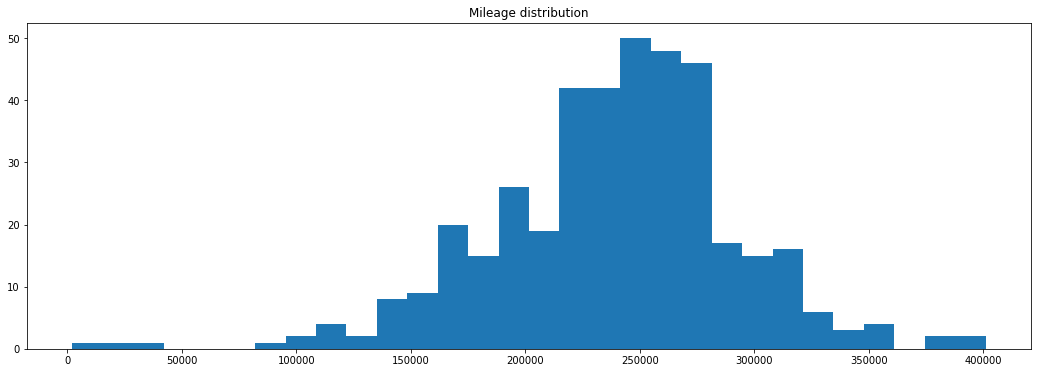

In [56]:
plt.figure(figsize=(18,6))
plt.hist(Xy[:,1],30)
plt.title("Mileage distribution")
plt.show()

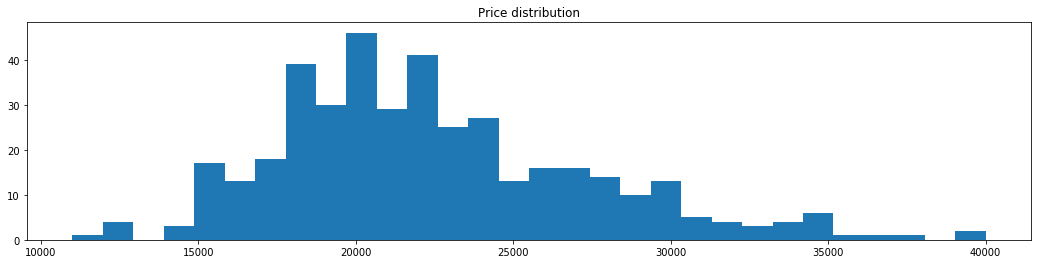

In [62]:
plt.figure(figsize=(18,5))
plt.hist(Xy[:,3],30)
plt.title("Price distribution")
plt.show()

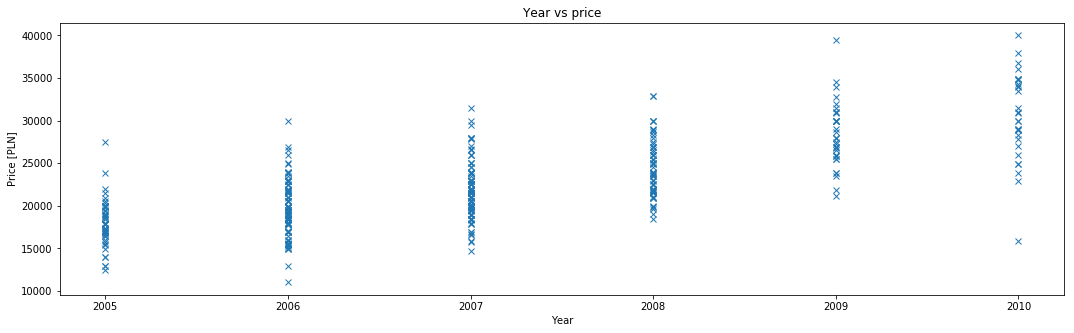

In [81]:
plt.figure(figsize=(18,5))
plt.title("Year vs price")
plt.xlabel("Year")
plt.ylabel("Price [PLN]")
plt.plot(Xy[:,0],Xy[:,3],"x")
plt.show()

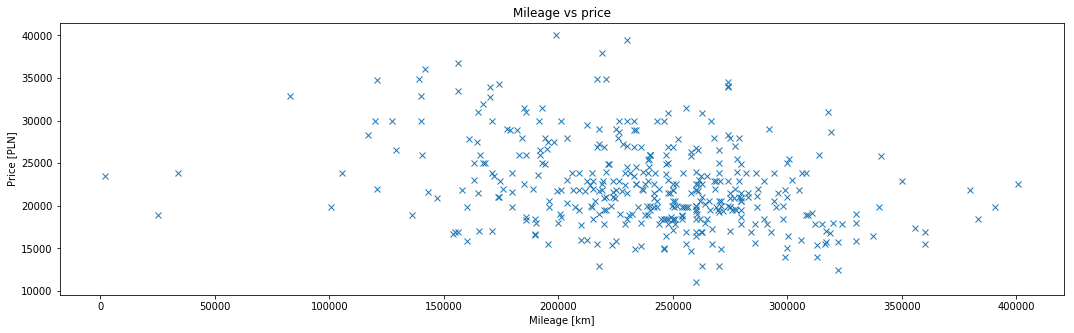

In [79]:
plt.figure(figsize=(18,5))
plt.title("Mileage vs price")
plt.xlabel("Mileage [km]")
plt.ylabel("Price [PLN]")
plt.plot(Xy[:,1],Xy[:,3],"x")
plt.show()

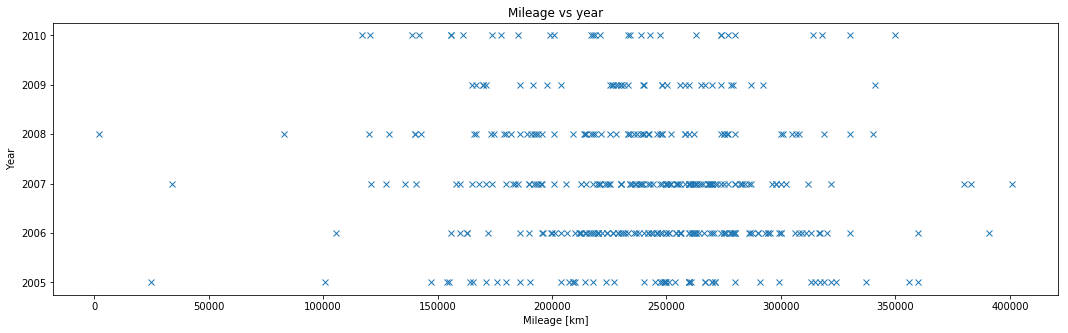

In [80]:
plt.figure(figsize=(18,5))
plt.title("Mileage vs year")
plt.xlabel("Mileage [km]")
plt.ylabel("Year")
plt.plot(Xy[:,1],Xy[:,0],"x")
plt.show()

### Divide samples to train and test

In [6]:
X_train, y_train, X_test, y_test = car_price_prediction.split_data(Xy, percent_of_test_data) 

print('Training samples: %d' % len(X_train))
print('Test samples: %d' % len(X_test))


Training samples: 71
Test samples: 24


### Let's train!

In [7]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

np.set_printoptions(formatter={'float_kind': '{:f}'.format})
print('Interceptor: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

Interceptor:  [-4235545.194129]
Coefficients:  [[2123.550168 -0.018603 0.251380]]


### Let's test

In [8]:
y_pred = regr.predict(X_test)

#print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.71


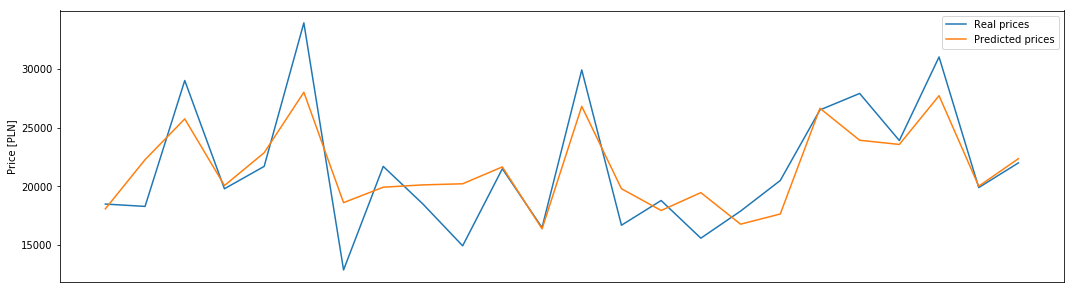

In [91]:
plt.figure(figsize=(18,5))
plt.plot(y_test, label='Real prices')
plt.plot(y_pred, label='Predicted prices')
plt.xticks(())
plt.ylabel("Price [PLN]")
plt.legend()
plt.show()

## What is the best price for... 

### Passat B6 1.9 TDI 2009 with 188 000 mileage

 - 1.6 = 1598
 - 1.9 = 1896
 - 2.0 = 1968

In [11]:
price_pred = regr.predict([[2009,180000, 1896]])
print('The best price for VW Passat B6 1.9 TDI 2009 with 188 000 mileage is %.2f PLN' % price_pred[0][0])

The best price for VW Passat B6 1.9 TDI 2009 with 188 000 mileage is 27795.19 PLN


### Passat B6 2.0 TDI 2006 with 288 000 mileage

In [10]:
price_pred = regr.predict([[2006,288000, 1968]])
print('The best price for VW Passat B6 2.0 TDI 2006 with 288 000 mileage is  %.2f PLN' % price_pred[0][0])

The best price for VW Passat B6 2.0 TDI 2006 with 288 000 mileage is 19433.53 PLN
